# Análisis de abandono de clientes en Maven Telecom.

En este análisis, nuestro objetivo es mejorar la retención, mediante la identificación de clientes de alto valor y factores de abandono.

## Mi proceso para abordar este problema es así:

1. Quiénes son nuestros mejores clientes: caules son sus caracteristicas y cómo gastan su dinero (con nosotros)
2. Por qué se van y que podemos hacer para retenerlos.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
churn_all = pd.read_csv('maven_churn/telecom_customer_churn.csv')
#churn_all.info()

In [35]:
# c.execute(
  # "CREATE TABLE churn_all AS SELECT * FROM read_csv_auto('maven_churn/telecom_customer_churn.csv');"
#)

In [35]:
churn_all['Total Revenue'].sum()

21371131.69

In [31]:
#Churn Ratio
ratio = churned.shape[0] / churn_all.shape[0] * 100
print(round(ratio),'%')

27 %


In [15]:
#Porcentaje de revenue total que representaban los clientes que abandonaron Maven Telecom

porcentaje = f"{(churned['Total Revenue'].sum() / churn_all['Total Revenue'].sum()) * 100:.0f}%"
print("Un significativo", porcentaje)

Un significativo 17%


### El revenue total de los clientes que se fueron es de 17% lo cual es bastante significativo.

### Dividiremos los datos en dos partes clientes que estan y clientes que abandonaron.

In [42]:
no_churn = churn_all.loc[churn_all['Customer Status'].isin(['Stayed', 'Joined'])]

In [43]:
churned = churn_all[churn_all['Customer Status'] == 'Churned']

## Clientes de Alto valor por Revenue.

### Vamos a ver que servicios tienen, cuales son sus caracteristicas, y cuanto tiempo están nosotros los clientes actuales, que nos reportan mejores ingresos. el umbral (threshold) es la media de gasto que hace el 70 % de nuestros clientes actuales.

In [138]:
no_churn['Total Revenue'].quantile(0.7)

4685.91

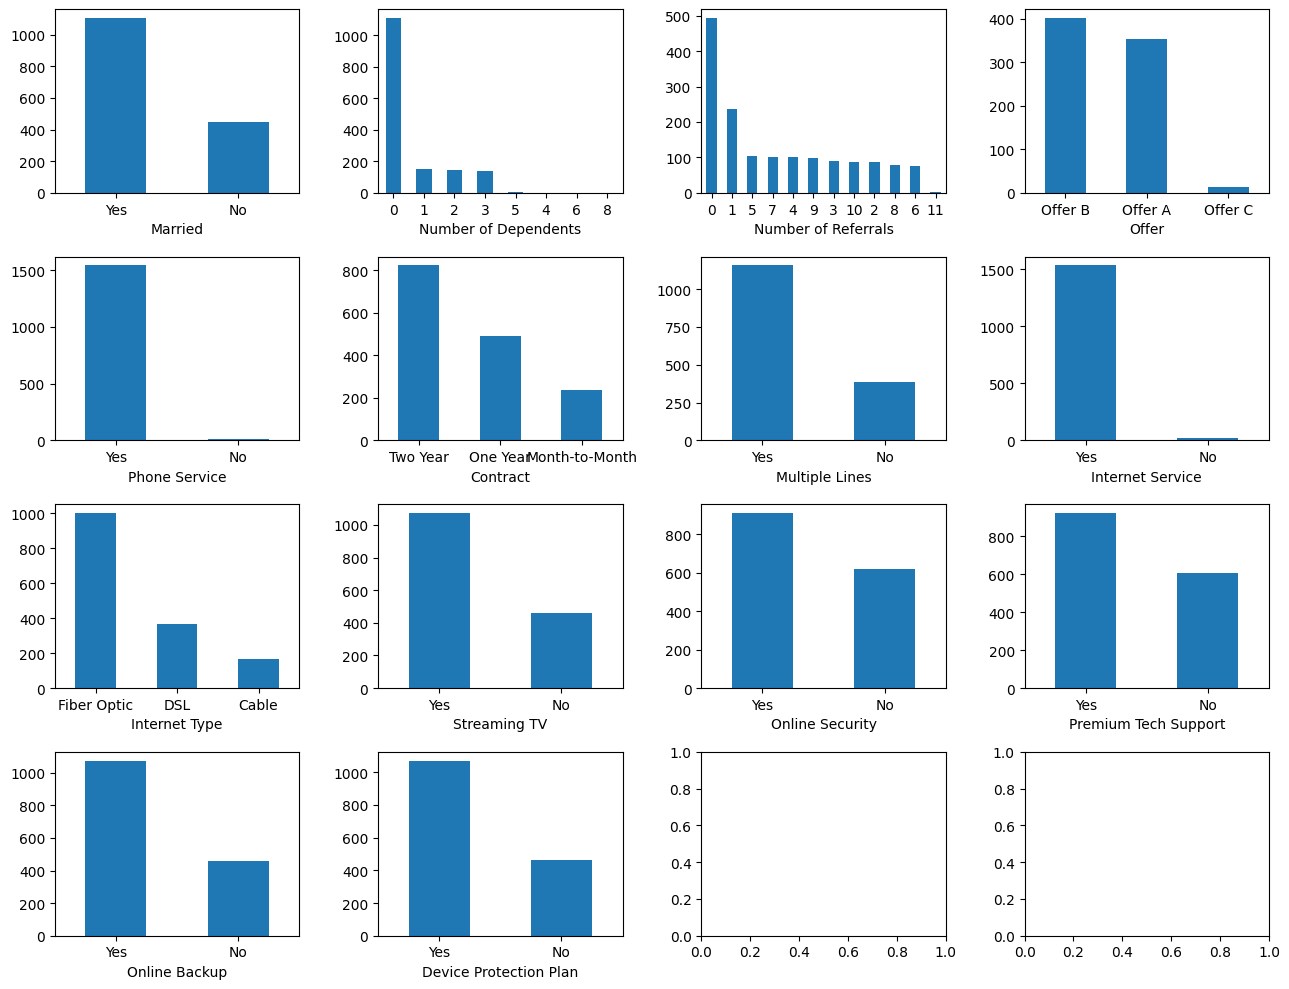

In [141]:
thresh = 4685.91
fig, ax = plt.subplots(4,4, figsize=(13, 10))

# Generar plots para cada atributo
for i, column in enumerate(['Married', 'Number of Dependents',
                            'Number of Referrals', 'Offer',
                            'Phone Service', 'Contract',
                            'Multiple Lines', 'Internet Service',
                            'Internet Type', 'Streaming TV',
                            'Online Security', 'Premium Tech Support',
                            'Online Backup', 'Device Protection Plan']):
    row = i // 4
    col = i % 4

    # Filtrar los datos para nuestros clientes que superan el umbral de revenue
    column_revenue = no_churn[column].loc[no_churn['Total Revenue'] > thresh].value_counts()

    # Generar el gráfico de barras para la columna actual
    column_revenue.plot(kind='bar', rot=0, ax=ax[row, col])
    ax[row, col].set_xlabel(column)
# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

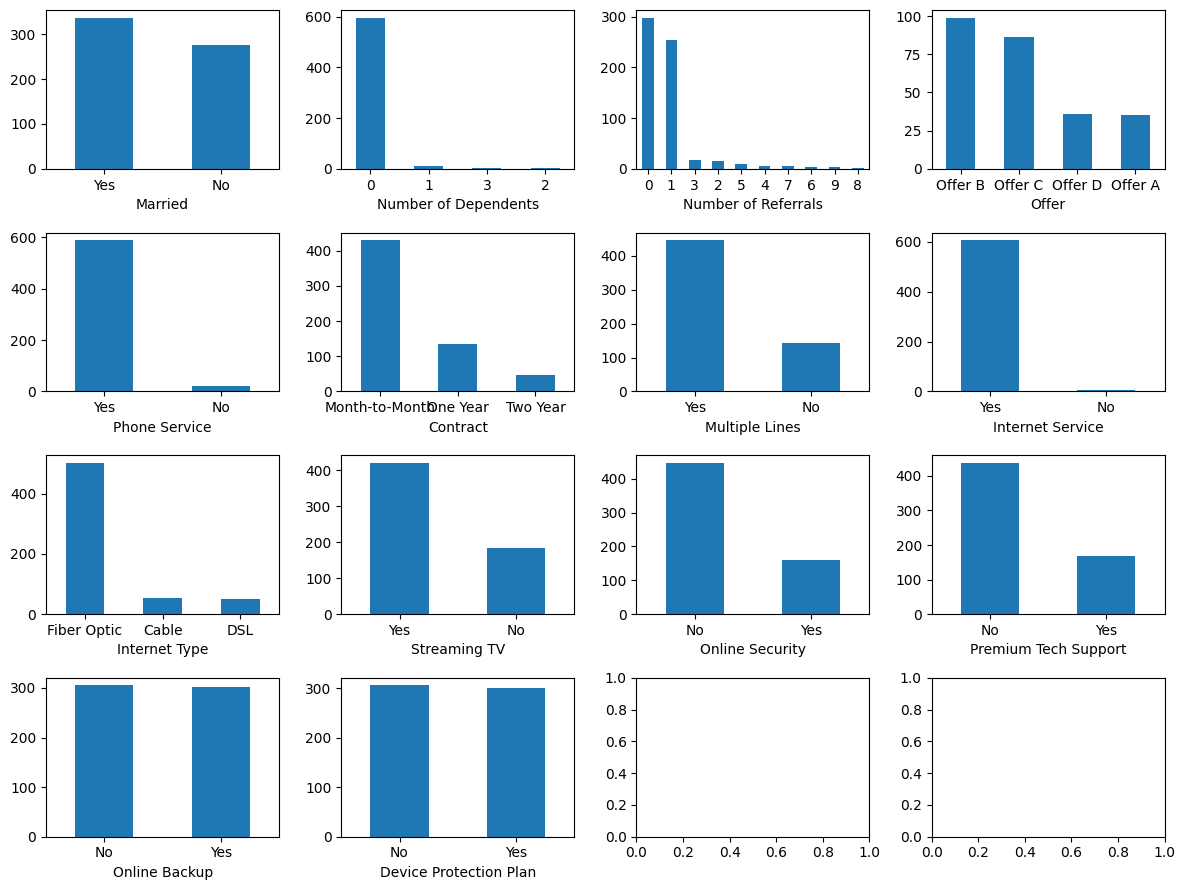

In [119]:
# Ahora visualizaremos las caracteristicas de los clientes que abandonaron.
thresh2 = 1971
fig, ax = plt.subplots(4,4, figsize=(12, 9))

# Generar plots para cada atributo
for i, column in enumerate(['Married', 'Number of Dependents',
                            'Number of Referrals', 'Offer',
                            'Phone Service', 'Contract',
                            'Multiple Lines', 'Internet Service',
                            'Internet Type', 'Streaming TV',
                            'Online Security', 'Premium Tech Support',
                            'Online Backup', 'Device Protection Plan']):
    row = i // 4
    col = i % 4

    # Filtrar los datos para nuestros clientes que superan el umbral de revenue
    column_revenue = churned[column].loc[churned['Total Revenue'] > thresh2].value_counts()

    # Generar el gráfico de barras para la columna actual
    column_revenue.plot(kind='bar', rot=0, ax=ax[row, col])
    ax[row, col].set_xlabel(column)
# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [49]:
churn_all.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [44]:
#La basta mayoria de abandonos vienen de contratos mes a mes

churned['Contract'].value_counts()

Contract
Month-to-Month    1655
One Year           166
Two Year            48
Name: count, dtype: int64

In [198]:
# De los que abandonaron, vamos a ver que promedio de meses se mantuvo en la compañia el percentil 50%.

churned['Tenure in Months'].quantile(0.5)

10.0

In [16]:
""" 
Sabiendo que el 50% de dichos clientes abandonaron despues de 10 meses,
Vamos a dividir los datos despues de 12 meses que es un periodo más
manejable en terminos de contratos de servicios.

"""

churned_desp_año = churned[churned['Tenure in Months'] > 12]
churned_ant_año = churned[churned['Tenure in Months'] < 12]

In [18]:
churned_desp_año['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                132
Competitor made better offer                 118
Attitude of support person                    95
Don't know                                    66
Competitor offered more data                  64
Competitor offered higher download speeds     49
Product dissatisfaction                       43
Attitude of service provider                  37
Price too high                                37
Service dissatisfaction                       33
Network reliability                           28
Long distance charges                         24
Moved                                         22
Extra data charges                            20
Lack of affordable download/upload speed      15
Poor expertise of online support              15
Lack of self-service on Website               14
Limited range of services                     13
Poor expertise of phone support                5
Deceased                                       2
Name: c

In [17]:
churned_ant_año['Churn Reason'].value_counts()

Churn Reason
Competitor made better offer                 186
Competitor had better devices                176
Attitude of support person                   117
Don't know                                    63
Attitude of service provider                  57
Competitor offered more data                  52
Competitor offered higher download speeds     48
Network reliability                           44
Long distance charges                         40
Price too high                                38
Product dissatisfaction                       31
Service dissatisfaction                       29
Moved                                         24
Limited range of services                     23
Poor expertise of online support              16
Extra data charges                            16
Lack of self-service on Website               15
Lack of affordable download/upload speed      14
Poor expertise of phone support                6
Deceased                                       4
Name: c

In [36]:
# % de contratos que tenian las personas que abandonaron 
# Debemos prestar atencion también a los 200 que tenian contratos anuales y bi-anuales
churned_desp_año['Contract'].value_counts() /churned_desp_año.shape[0]

Contract
Month-to-Month    0.758413
One Year          0.183894
Two Year          0.057692
Name: count, dtype: float64

In [120]:
"""
En promedio los que abandonaron la empresa,
pagaban hasta 20$ más que el promedio global
y el promedio de nuestros clientes actuales.

Podemos ganar más mensualmente pero no beneficia el LTV.

"""
churned['Monthly Charge'].describe()

count    1869.000000
mean       73.347592
std        26.373764
min       -10.000000
25%        55.300000
50%        79.500000
75%        94.200000
max       118.350000
Name: Monthly Charge, dtype: float64

In [40]:
no_churn['Monthly Charge'].describe()

count    5174.000000
mean       60.073618
std        32.056245
min       -10.000000
25%        24.800000
50%        63.200000
75%        87.500000
max       118.750000
Name: Monthly Charge, dtype: float64

<Axes: ylabel='count'>

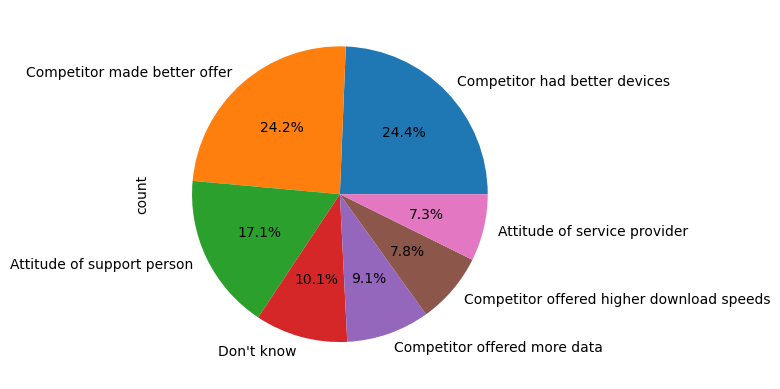

In [136]:
# Top Razones de abandono de la compañia
churned['Churn Reason'].value_counts().head(7).plot(kind='pie',autopct='%1.1f%%',)


In [137]:
#La mayoria de los abandonos vienen de la categoria "competidor"

churned['Churn Category'].value_counts()

Churn Category
Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: count, dtype: int64

### Algunas comparaciones de servicios.

In [194]:
churned['Premium Tech Support'].value_counts()

Premium Tech Support
No     1446
Yes     310
Name: count, dtype: int64

In [196]:
# En contraste

no_churn['Premium Tech Support'].value_counts()

Premium Tech Support
No     2027
Yes    1734
Name: count, dtype: int64

In [195]:
churned['Internet Type'].value_counts()

Internet Type
Fiber Optic    1236
DSL             307
Cable           213
Name: count, dtype: int64

In [197]:
no_churn['Internet Type'].value_counts()

Internet Type
Fiber Optic    1799
DSL            1345
Cable           617
Name: count, dtype: int64

In [24]:
churned['Offer'] = churned['Offer'].fillna('No offer')

C:\Users\ricar\AppData\Local\Temp\ipykernel_23616\1728440992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned['Offer'] = churned['Offer'].fillna('No offer')


In [26]:
churned_desp_año['Offer'] = churned_desp_año['Offer'].fillna('No offer')
churned_desp_año['Offer'].value_counts()

C:\Users\ricar\AppData\Local\Temp\ipykernel_23616\3772971302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_desp_año['Offer'] = churned_desp_año['Offer'].fillna('No offer')


Offer
No offer    487
Offer D     114
Offer B     101
Offer C      95
Offer A      35
Name: count, dtype: int64

In [181]:
#La oferta E para nuevos clientes no esta funcionando bien.
churned_ant_año['Offer'].value_counts()

Offer
No offer    541
Offer E     426
Offer D      32
Name: count, dtype: int64

In [190]:
churned_desp_año.shape

(832, 38)

In [23]:
churned['Premium Tech Support'].value_counts()

Premium Tech Support
No     1446
Yes     310
Name: count, dtype: int64